
## Finding Potential customers From Health to Car Insurance Using ML

[1. EXPLORATORY DATA ANALYSIS](#1)  
  
[2. DATA VISUALIZATION](#5)

[3. STATISTICAL ANALYSIS](#2)

[4. HANDLING MISSING VALUES](#3)

[5. CORRELATION ](#4)
> [4.1. Pearson's correlation](#41)

> [4.2. Spearman's correlation](#42)

[6. FEATURE SELECTION](#6)

[7. MODEL DEVELOPMENT](#7)
   >> [7.1. Model with manual preprocessing](#71)   
   >> [7.2. Model with selected feature](#72)  
   >> [7.3. Final Model](#73)

[8. HYPERPARAMETER](#8)
   >> [8.1. Hyperparameter optimisation using grid search](#81)   
   >> [8.2. Hyperparameter optimisation using Random search](#82)  
   >> [8.3. Feature Importance](#83)
   _______________________________


In [1]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.compose import make_column_selector as selector
from imblearn.over_sampling import SMOTE

## 1. Load the data :

In [2]:
#load and store data into a dataframe
dataframe = pd.read_csv('CW1_data_202223.csv')

## Exploratory Data Analysis by analyzing the dataset<a name="1"></a>

In [3]:
# 1.Checking the different features present in the dataset:
dataframe.head()

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0


In [4]:
# Checking the shape of the dataset:
dataframe.shape

(304887, 12)

There are 304887 rows and 12 column in the given dataset.



## Variable Identification
Split the dataset into input (denoted by x) and output (denoted by y) pairs. The output is the target that the machine learning model will be built to predict for.

In [5]:
# split the data into input(X) and output(Y)
insurance_x = dataframe.iloc[:,1:-1]
insurance_y = dataframe.iloc[ :, -1:]
print(insurance_x.head())
print(insurance_y.head())

   Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge PastAccident  \
0  Female  39.0                1.0      15.0     0.0   1-2 Year          NaN   
1    Male  38.0                1.0      11.0     NaN   1-2 Year          NaN   
2    Male  22.0                1.0      30.0     NaN   < 1 Year          NaN   
3  Female  23.0                1.0       NaN     NaN   < 1 Year          NaN   
4    Male  56.0                1.0      48.0     0.0  > 2 Years          NaN   

  AnnualPremium  SalesChannelID  DaysSinceCreated  
0    £2,645.30               55               227  
1    £1,151.90               26                29  
2    £2,265.90              152               166  
3    £1,456.60              151               277  
4      £131.50              154               155  
   Result
0       1
1       0
2       0
3       0
4       0


Column names<a name="11"></a>

In [6]:
# Printing all the column names
print('\n ---Column names of the dataset --- \n', insurance_x.columns)


 ---Column names of the dataset --- 
 Index(['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch',
       'VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID',
       'DaysSinceCreated'],
      dtype='object')


In [7]:
# Datatypes of columns in dataset
insurance_x.dtypes

Gender                object
Age                  float64
HasDrivingLicense    float64
RegionID             float64
Switch               float64
VehicleAge            object
PastAccident          object
AnnualPremium         object
SalesChannelID         int64
DaysSinceCreated       int64
dtype: object

In [8]:
#Trying to remove commas and dollars signs in df
insurance_x['AnnualPremium'] = insurance_x['AnnualPremium'].str.replace(',', '').str.replace('£', '').astype(float)
dataframe['AnnualPremium'] = dataframe['AnnualPremium'].str.replace(',', '').str.replace('£', '').astype(float)

In [9]:
# 2.Checking the data type of each columns and non-null count:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  float64
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 27.9+ MB


In [10]:
#Find the duplicates
dataframe.duplicated().sum()

0

In [11]:
# 3.Encoding the labels for classification problems:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(insurance_y['Result'])
insurance_y

,Result
0,1
1,0
2,0
3,0
4,0
...,...
304882,0
304883,0
304884,0
304885,0


In [12]:
# Matches the above value counts
print(insurance_y['Result'].value_counts())

0    267700
1     37187
Name: Result, dtype: int64


In [13]:
# Printing the Unique Variable in the Categorical features
print('The Unique element in Gender are : ',insurance_x['Gender'].unique())
print('The Unique element in HasDrivingLicense are : ',insurance_x['HasDrivingLicense'].unique())
print('The Unique element in VehicleAge are : ',insurance_x['VehicleAge'].unique())
print('The Unique element in PastAccident are : ',insurance_x['PastAccident'].unique())
print('\nThe Unique element in RegionID are : ',insurance_x['RegionID'].unique())
print('\nThe Unique element in SalesChannelID are : ',insurance_x['SalesChannelID'].unique())

The Unique element in Gender are :  ['Female' 'Male' nan]
The Unique element in HasDrivingLicense are :  [ 1. nan  0.]
The Unique element in VehicleAge are :  ['1-2 Year' '< 1 Year' '> 2 Years' nan]
The Unique element in PastAccident are :  [nan 'Yes' 'No']

The Unique element in RegionID are :  [15. 11. 30. nan 48. 18. 28. 37. 47. 24. 10. 21. 14.  7. 46.  8. 29.  3.
 38. 41.  1. 39. 12. 49. 23.  0.  9. 33.  6. 44. 13.  4. 36. 43. 34.  2.
 32. 35. 27. 50. 45.  5. 20. 17. 25. 26. 40. 22. 16. 19. 31. 51. 52. 42.]

The Unique element in SalesChannelID are :  [ 55  26 152 151 154 124 160   9 157  19 156  12 150  25 122 163   1 153
  29 125  31  73  91  94  13 136   7 155  61  24  52 147 128  45  14 120
 106  15 109 133  81  11 148 158  56  90  60  42 111   3 107   8  30 139
 127  16 137  37 135 103 116  22   4  23  21  10  54  67 132 134  57  64
 108  44  65 146 113  18 138  80 131 119  47  70  58 140 129  35  32  39
  59  36  97 145 121  98 159  48 130  93  17  34  40 101  92  88  96  38


In [14]:
pd.DataFrame(dataframe.nunique())

,0
id,304887
Gender,2
Age,66
HasDrivingLicense,2
RegionID,53
Switch,2
VehicleAge,3
PastAccident,2
AnnualPremium,46328
SalesChannelID,151


## Missing Values?
Check if the dataset contains missing values

In [15]:
# 4.Checking for missing values:
insurance_x.isnull().sum()

Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
dtype: int64

_______________________________
### The Statistics of the Numerical Features<a name="114"></a>
___

,Age,HasDrivingLicense,RegionID,Switch,AnnualPremium,SalesChannelID,DaysSinceCreated
count,274339.00,274399.00,274334.00,152557.00,304887.00,304887.00,304887.00
mean,38.83,1.00,26.41,0.46,1528.59,111.97,154.27
std,15.50,0.05,13.21,0.50,862.71,54.23,83.64
min,20.00,0.00,0.00,0.00,131.50,1.00,10.00
25%,25.00,1.00,15.00,0.00,1220.32,26.00,82.00
50%,36.00,1.00,28.00,0.00,1583.75,131.00,154.00
75%,49.00,1.00,35.00,1.00,1970.70,152.00,227.00
max,85.00,1.00,52.00,1.00,27008.25,163.00,299.00


<AxesSubplot:>

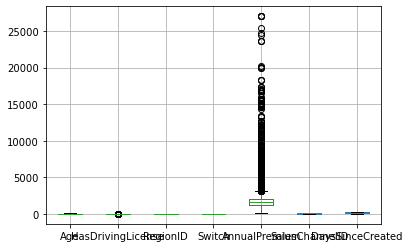

In [16]:
# 5.Descriptive summary of the dataset:
df_num = insurance_x[insurance_x.describe().columns]
display(df_num.describe().round(2))
df_num.boxplot()

In [17]:
# find the Coefficient Of Variation 
print ("The Coefficient_Of_Variation")
for i in df_num:
    coefficient_of_variation= (df_num[i].std())/(df_num[i].mean())
    print(i,"|",coefficient_of_variation)

The Coefficient_Of_Variation
Age | 0.3992541749834047
HasDrivingLicense | 0.04638032484938297
RegionID | 0.500336967592725
Switch | 1.087232398019002
AnnualPremium | 0.5643833507731455
SalesChannelID | 0.48434151920165586
DaysSinceCreated | 0.5421726491556406


_______________________________
### The Statistics of the Categorical Features<a name="124"></a>
___

In [18]:
# Statistics of the Categorical Features
df_cat = dataframe[dataframe.describe(include='object').columns]
df_cat.describe()

,Gender,VehicleAge,PastAccident
count,274460,274446,152422
unique,2,3,2
top,Male,1-2 Year,Yes
freq,148391,144374,76976


_______________________________
### The Statistics of the Target Variable<a name="124"></a>
___

In [19]:
# 6. Checking the distribution of the target variable:
insurance_y['Result'].value_counts()

0    267700
1     37187
Name: Result, dtype: int64

In [20]:
# 7. Grouping the data based on target variable:
dataframe.groupby('Result').mean()

,id,Age,HasDrivingLicense,RegionID,Switch,AnnualPremium,SalesChannelID,DaysSinceCreated
Result,,,,,,,,
0,190697.627815,38.185282,0.997688,26.350045,0.520604,1521.359138,114.746421,154.304572
1,189848.813107,43.485836,0.999043,26.833898,0.003481,1580.664221,91.955280,154.042515


## EDA By visualization<a name="5"></a>

## Categorical Variables Visualization<a name="51"></a>

<AxesSubplot:xlabel='Result', ylabel='count'>

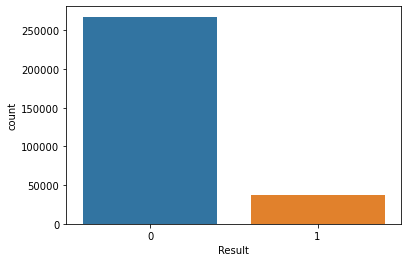

In [21]:
# 1. Count plot for Categorical columns:
sns.countplot(x='Result', data=dataframe)

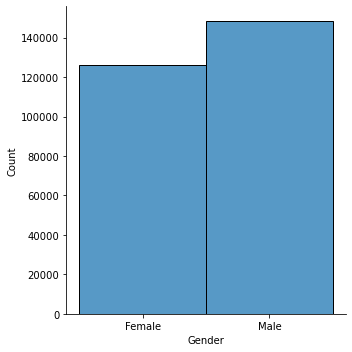

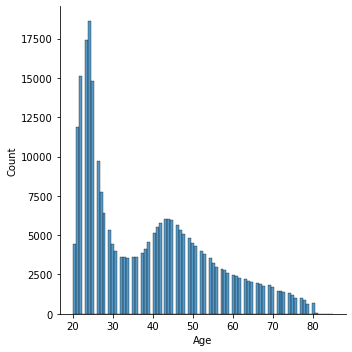

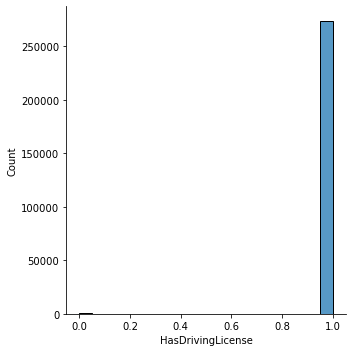

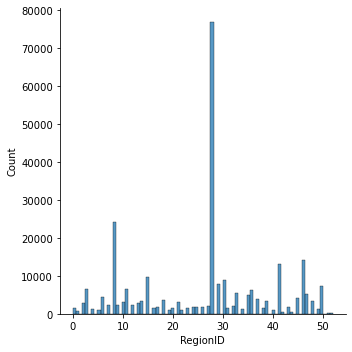

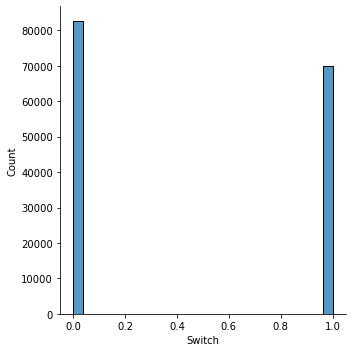

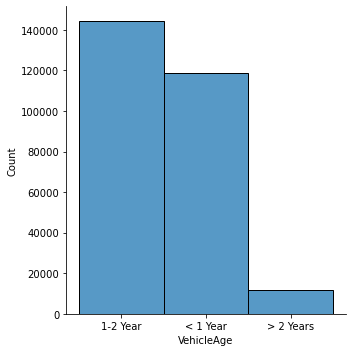

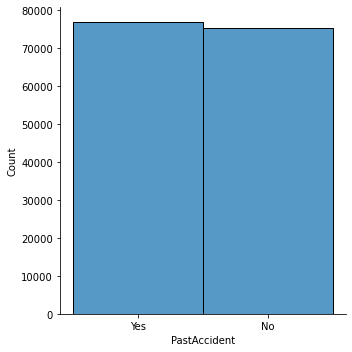

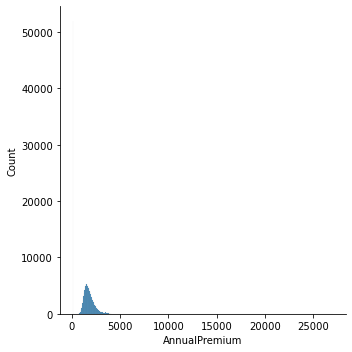

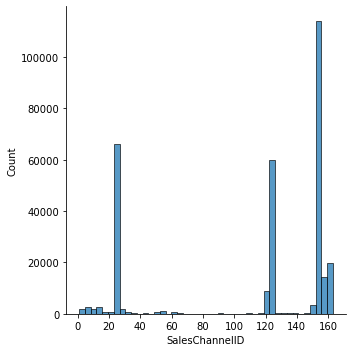

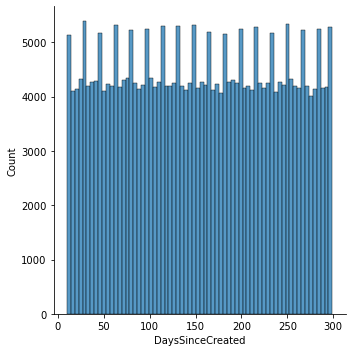

In [22]:
# 2. Distribution plot for all columns:
for column in insurance_x:
     sns.displot(x=column, data=insurance_x)

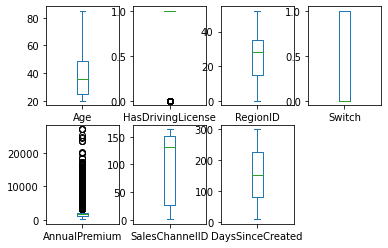

In [23]:
# 4. Checking for Outliers: 
# box and whisker plots
insurance_x.plot(kind='box', subplots=True, \
             layout=(2,4), sharex=False, sharey=False)
plt.show()

<AxesSubplot:xlabel='DaysSinceCreated', ylabel='Density'>

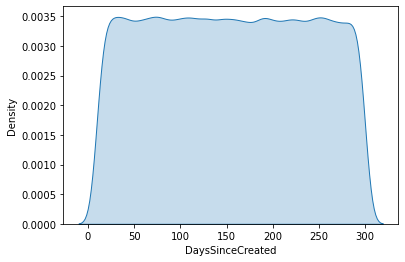

In [24]:
# density plot
sns.kdeplot(dataframe['DaysSinceCreated'], shade=True)

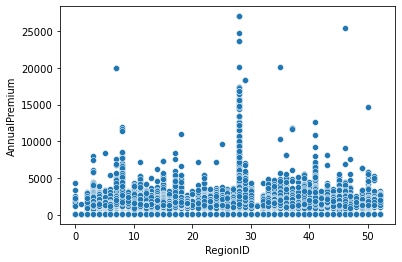

In [25]:
# scatter plots
sns.scatterplot(data = dataframe, x = "RegionID", y = "AnnualPremium")
plt.show()

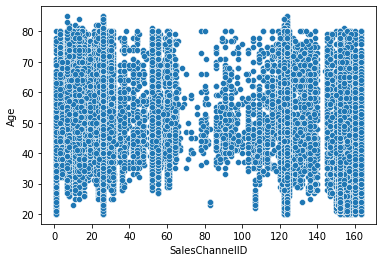

In [26]:
sns.scatterplot(data = dataframe, x = "SalesChannelID", y = "Age")
plt.show()

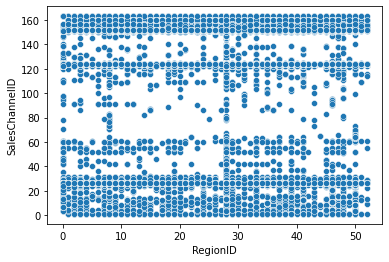

In [27]:
sns.scatterplot(data = dataframe, x = "RegionID", y = "SalesChannelID")
plt.show()

## Discrete Variables Visualization<a name="52"></a>

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='AnnualPremium', ylabel='Age'>,
        <AxesSubplot:xlabel='SalesChannelID', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='AnnualPremium'>,
        <AxesSubplot:xlabel='AnnualPremium', ylabel='AnnualPremium'>,
        <AxesSubplot:xlabel='SalesChannelID', ylabel='AnnualPremium'>],
       [<AxesSubplot:xlabel='Age', ylabel='SalesChannelID'>,
        <AxesSubplot:xlabel='AnnualPremium', ylabel='SalesChannelID'>,
        <AxesSubplot:xlabel='SalesChannelID', ylabel='SalesChannelID'>]],
      dtype=object)

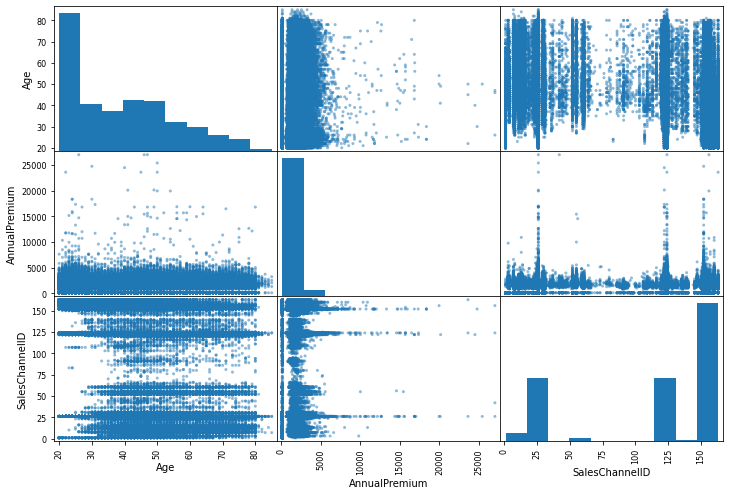

In [28]:
# 3. Use scatter_matrix of pandas.plotting    
from pandas.plotting import scatter_matrix
scatter_matrix(insurance_x[['Age', 'AnnualPremium', 'SalesChannelID']], figsize=(12, 8))

<AxesSubplot:xlabel='AnnualPremium', ylabel='Density'>

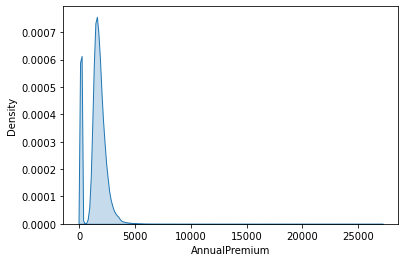

In [29]:
sns.kdeplot(dataframe['AnnualPremium'], shade=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

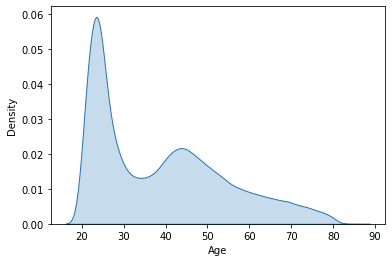

In [30]:
sns.kdeplot(dataframe['Age'], shade=True)

To check the dispersion of the data

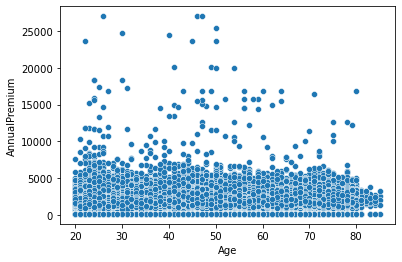

In [31]:
sns.scatterplot(data = dataframe, x = "Age", y = "AnnualPremium")
plt.show()

Regression Plot

<AxesSubplot:xlabel='Age', ylabel='AnnualPremium'>

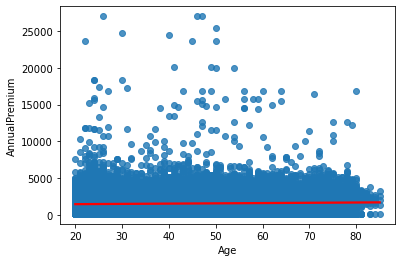

In [32]:
sns.regplot(x='Age', y ='AnnualPremium', data = dataframe, line_kws={"color": "red"})

<AxesSubplot:xlabel='Age', ylabel='RegionID'>

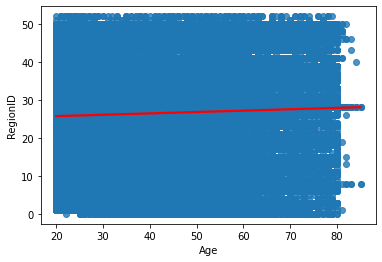

In [33]:
sns.regplot(x='Age', y ='RegionID', data = dataframe, line_kws={"color": "red"})

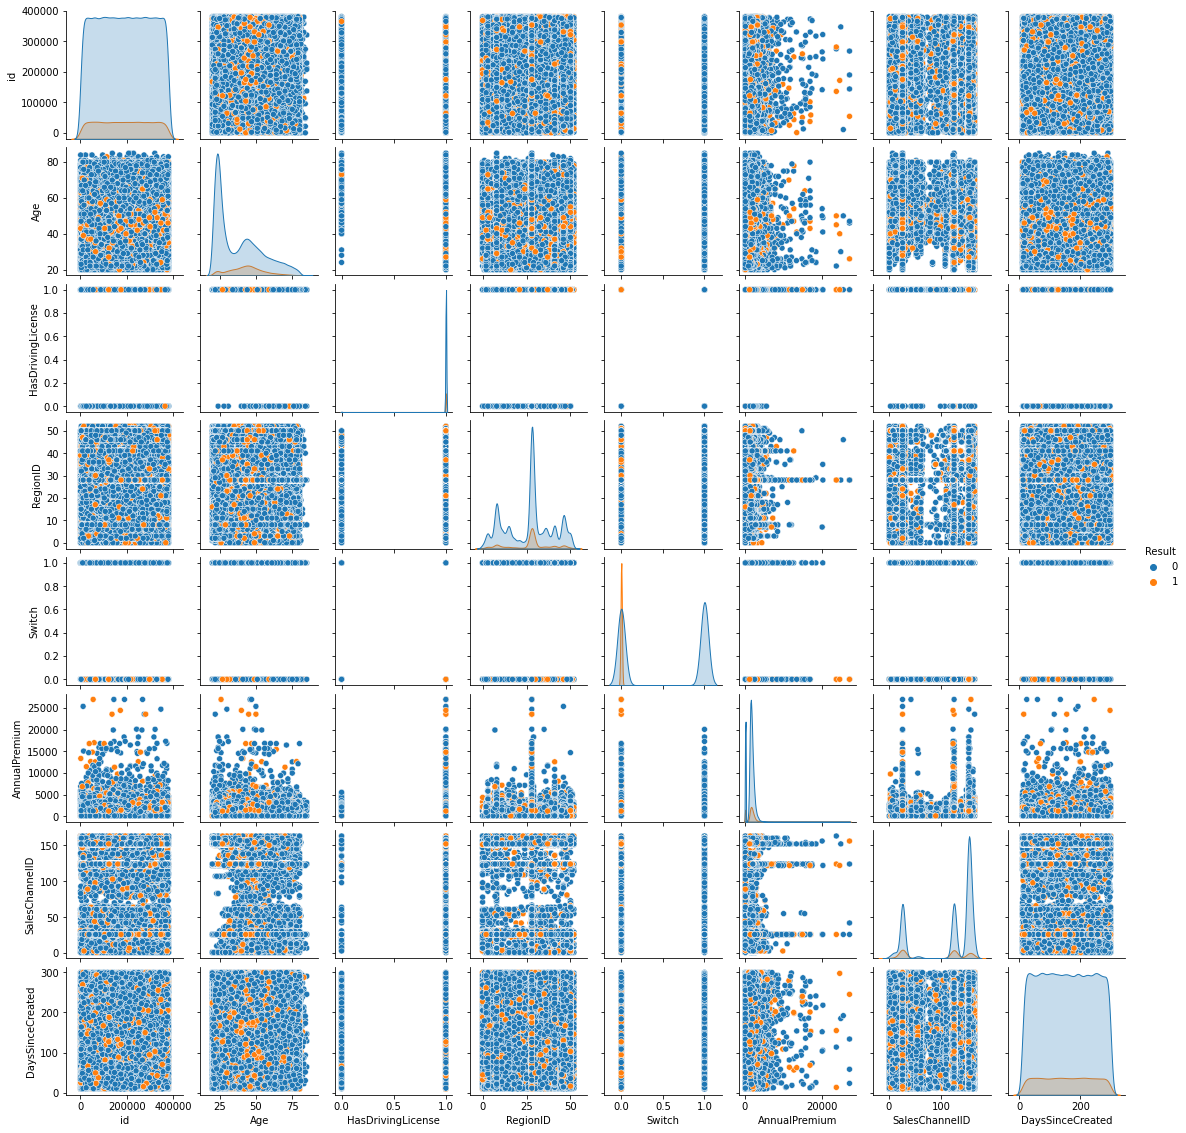

In [ ]:
sns.pairplot(dataframe,hue='Result', height=2); 

# Checking for Outliers<a name="2"></a>

In [34]:
# This is a function that finds the outliers that are outside of 1.5xIQR. 
# It returns what value the outlier has, and where in the dataset they are
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [35]:
outlier_indices, outlier_values = find_outliers_tukey(insurance_x['DaysSinceCreated'])
print(len(np.sort(outlier_values)))

0


In [36]:
outlier_indices, outlier_values = find_outliers_tukey(insurance_x['Amount'])
print(len(np.sort(outlier_values)))

8231


In [37]:
outlier_indices, outlier_values = find_outliers_tukey(insurance_x['Age'])
print(len(np.sort(outlier_values)))

0


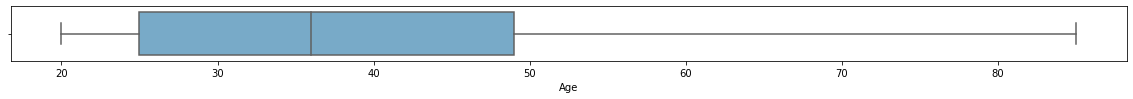

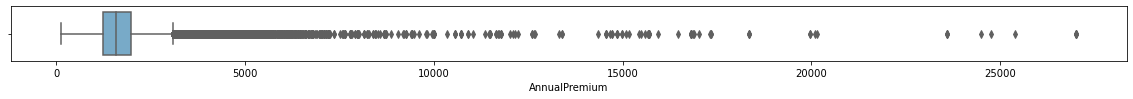

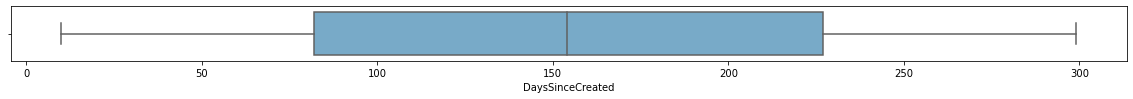

In [38]:
# Checking for outliers using boxing only on Numerical features
for cat in ['Age','AnnualPremium', 'DaysSinceCreated']:
    plt.figure(figsize=(20,1))    
    sns.boxplot(data=dataframe, x=cat,palette='Blues')
 

In [39]:
'''the turkey method '''
for cat in ['AnnualPremium']:
    Q3, Q1 = np.percentile(dataframe[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    IQR = Q3 - Q1
    print('Interval:[', Q1 - 1.5*IQR,'&',Q3+ 1.5*IQR,']')
    print('min=',dataframe[cat].min())
    print('max=',dataframe[cat].max())
    
    n=((dataframe[cat]>= (Q3+ 1.5*IQR)).sum())
    m=((dataframe[cat]<= (Q1 - 1.5*IQR)).sum())
    print('pecentage of outliers(max):',n/dataframe.shape[0])
    print('pecentage of outliers(min):',m/dataframe.shape[0])

___________________________________________________
AnnualPremium
___________________________________________________
Interval:[ 94.76249999999936 & 3096.2625000000007 ]
min= 131.5
max= 27008.25
pecentage of outliers(max): 0.026996887371386776
pecentage of outliers(min): 0.0


In [40]:
'''Statistical theory method'''
#here we are going to use Statistical theory to observe the outliers (diffrerent from Turkey method )    
for cat in ['AnnualPremium']:
    Q3, Q1 = np.percentile(dataframe[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    print('Q1=',Q1)
    print('Q3=',Q3)
    IQR = Q3 - Q1
    print('IQR:',IQR)
    print('Interval:[', dataframe[cat].mean() - 3*IQR,'&',dataframe[cat].mean() + 3*IQR,']')
    print('min=',dataframe[cat].min())
    print('max=',dataframe[cat].max())
    n=((dataframe[cat]>= (dataframe[cat].mean() + 3*IQR)).sum())
    m=((dataframe[cat]<= (dataframe[cat].mean() - 3)).sum())
    print('pecentage of outliers(max):',n/dataframe.shape[0])
    print('pecentage of outliers(min):',m/dataframe.shape[0])

___________________________________________________
AnnualPremium
___________________________________________________
Q1= 1220.3249999999998
Q3= 1970.7
IQR: 750.3750000000002
Interval:[ -722.5324340657228 & 3779.7175659342793 ]
min= 131.5
max= 27008.25
pecentage of outliers(max): 0.008357194632765581
pecentage of outliers(min): 0.4551063180785012


In [41]:
# Removing the outliers
df_rmout=dataframe
df_rmout=df_rmout[(df_rmout.Age < 92)]
percentage_rm=(dataframe.shape[0]-df_rmout.shape[0])/dataframe.shape[0]
print('the percentage of removed data:',(percentage_rm*100))
df_rmout2=df_rmout
df_rmout2=df_rmout2[(df_rmout2.AnnualPremium <= 3779.7175659342647)&(df_rmout2.AnnualPremium > -722.5324340657369)]
percentage_rm=(dataframe.shape[0]-df_rmout2.shape[0])/dataframe.shape[0]
print('the percentage of removed data:',(percentage_rm*100))
df_rmout=df_rmout[(df_rmout.AnnualPremium <df_rmout.AnnualPremium.max())&(df_rmout.AnnualPremium>df_rmout.AnnualPremium.min() )]
df_rmout.shape
dataframe=df_rmout

the percentage of removed data: 10.019449828953023
the percentage of removed data: 10.766611892274842


#Handling Missing Values<a name="3"></a>

In [42]:
# Find the missing data by percentage
total = dataframe.isnull().sum()
percentage = (total/dataframe.isnull().count()).round(4)*100
NAs = pd.concat([total,percentage],axis=1,keys=('Total','Percentage'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Percentage
Switch,113901,50.07
PastAccident,113634,49.95
Gender,22722,9.99
VehicleAge,22720,9.99
RegionID,22697,9.98
HasDrivingLicense,22685,9.97


In [43]:
# Replace the Null value with Forward Fill
for name in dataframe.columns:
  dataframe[name] = dataframe[name].fillna(method ='pad')
dataframe = dataframe.replace({np.nan: 0})

In [44]:
dataframe.isnull().sum()

id                   0
Gender               0
Age                  0
HasDrivingLicense    0
RegionID             0
Switch               0
VehicleAge           0
PastAccident         0
AnnualPremium        0
SalesChannelID       0
DaysSinceCreated     0
Result               0
dtype: int64


# 4.CORRELATION  <a name="4"></a> 
_______________________________
## 4.1. Pearson's correlation <a name="41"></a> 
_______________________________

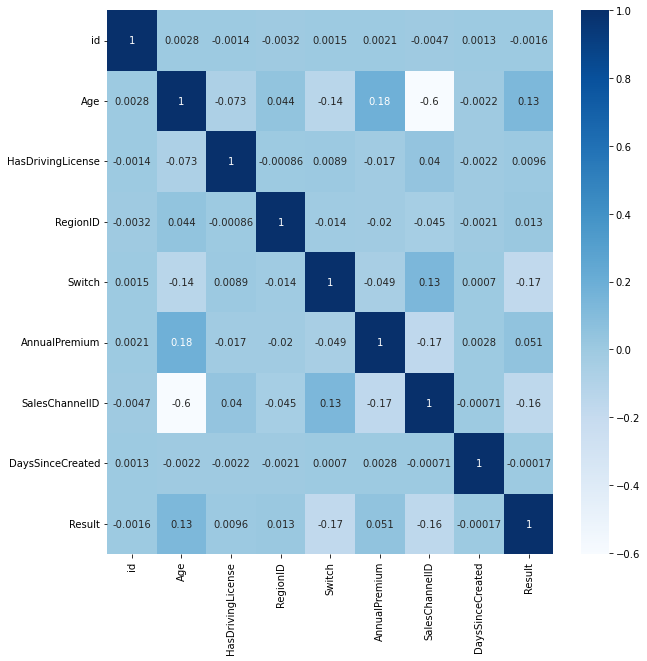

In [45]:
#Pearson's correlation
corrmat = dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataframe[top_corr_features].corr(),annot=True,cmap="Blues")

_______________________________
## 4.2. Spearman's correlation <a name="42"></a>
_______________________________

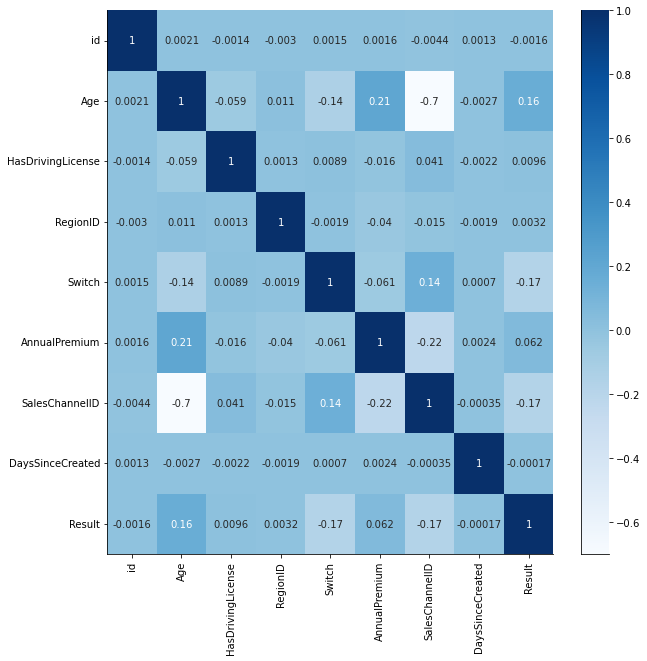

In [46]:
#Spearman's correlation
corr = dataframe.corr(method='spearman')
g = sns.heatmap(corr, annot=True, cmap="Blues")
sns.despine()
g.figure.set_size_inches(10,10)

# Feature Selection<a name="6"></a>
Using feature selection - selecte 5 main feature and built a model and tested on the test dataset

In [47]:
df = pd.read_csv('CW1_data_202223.csv')
# split the data into input and output
insurance_x1 = df[['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID', 'DaysSinceCreated']]
insurance_y1 = df[['Result']]
insurance_x1['AnnualPremium'] = insurance_x1['AnnualPremium'].str.replace(',', '').str.replace('£', '').astype(float)
insurance_x1 = insurance_x.replace({np.nan: 0})
insurance_x1.isnull().sum()
x= ['Gender', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge', 'PastAccident', 'SalesChannelID']
for cat in x:
    insurance_x1[cat] = LabelEncoder().fit_transform(insurance_x1[cat].astype(str))

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
fit = rfe.fit(insurance_x1, insurance_y1)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False  True False  True  True  True False False False]
Feature Ranking: [1 2 1 3 1 1 1 6 4 5]


In [49]:
insurance_x1.columns

Index(['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch',
       'VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID',
       'DaysSinceCreated'],
      dtype='object')

The features **['Gender', 'HasDrivingLicense', 'Switch', 'VehicleAge', 'PastAccident']** are given as most important feature.

Feature **'AnnualPremium', 'DaysSinceCreated'** are least important

Label Encoding

In [50]:
x= ['Gender', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge', 'PastAccident', 'SalesChannelID']
for cat in x:
  dataframe[cat] = LabelEncoder().fit_transform(dataframe[cat].astype(str))

#Model Development 1<a name="7"></a>

## Preprocessing Pipeline & ColumnTransformer
We now put all transformations using Pipeline & ColumnTransformer. Doing so not only makes code tidy but also has advantages:

*   allow to include the preprocessing steps in the hyperparameter tuning (will learn later)
*   avoid data leakage, i.e., avoid making the mistake of using any test data for model training
*   guarantee that your data is always preprocessed the same way. For example,  if a categorical feature has a category in the test set that does not occur in the training set or a category in the training set that doesn't occur in the test set.



## Split data into training set and test set

In [51]:
# 70% of the data for traingin, 30% for test, i.e., test_size=0.3
# split the data into input and output
X = dataframe.iloc[:,1:-1]
Y = dataframe.iloc[ :, -1:]
print(X.head())
print(Y.head())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=85, stratify=Y.iloc[:])

   Gender   Age  HasDrivingLicense  RegionID  Switch  VehicleAge  \
0       0  39.0                  1         7       0           0   
1       1  38.0                  1         3       0           0   
2       1  22.0                  1        24       0           1   
3       0  23.0                  1        24       0           1   
5       1  30.0                  1        10       0           1   

   PastAccident  AnnualPremium  SalesChannelID  DaysSinceCreated  
0             0         2645.3             101               227  
1             0         1151.9              71                29  
2             0         2265.9              51               166  
3             0         1456.6              50               277  
5             0         1755.9              51                92  
   Result
0       1
1       0
2       0
3       0
5       0


In [52]:
print(insurance_x.shape)
print(insurance_y.shape)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

(304887, 10)
(304887, 1)
X_train shape (151662, 10) and size 1516620
X_test shape (75831, 10) and size 758310
y_train shape (151662, 1) and size 151662
y_test shape (75831, 1) and size 75831



## 1. Scaling features to a range that you define
Commonly used ranges are [0, 1] and [-1, 1]

In [53]:
#from sklearn.compose import make_column_transformer
# transformer for categorical features
ord_cols = ['HasDrivingLicense', 'RegionID', 'Switch', 'PastAccident', 'SalesChannelID']
ohe_cols = ['Gender', 'VehicleAge']
num_cols = ['Age', 'AnnualPremium', 'DaysSinceCreated']

# Preprocessing pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),('scaler', StandardScaler())])

pipeline = ColumnTransformer([('num_imputer', num_pipeline, num_cols),
     ('ord_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ord_cols),
     ('ohe_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ohe_cols)])

X_train_processed = pipeline.fit_transform(X_train) # fit and transform X_train
X_test_processed = pipeline.transform(X_test) # transform X_test using the model fitted on X_train

## Classification Algorithms<a name="71"></a>
Selecting models for the classification problem 

In [54]:
results, cm, report = [], [], []
models = [('KNeighborsClassifier', KNeighborsClassifier()),('DecisionTree', DecisionTreeClassifier()),('RandomForest', RandomForestClassifier()),
          ('GaussianNB', GaussianNB()),('LogisticRegression',LogisticRegression())]

## Train the model

In [55]:
#%% evaluate each model in turn
for name, model in models:
    myClassfier = Pipeline([('preprocessing', pipeline),('classifier', model)])
    myClassfier.fit(X_train, y_train)
    y_pred = myClassfier.predict(X_test)
    report.append(classification_report(y_test,y_pred ))
    cm.append(metrics.confusion_matrix(y_test,y_pred))
    results.append("The Score of %s is : %2.2f " % (name, accuracy_score(y_test, y_pred)))

## Evaluate the model
We evalute the performance of the trained classifier on test set using confusion matrix

The Score of KNeighborsClassifier is : 0.86  
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     66697
           1       0.30      0.12      0.17      9134

    accuracy                           0.86     75831
   macro avg       0.60      0.54      0.55     75831
weighted avg       0.82      0.86      0.83     75831



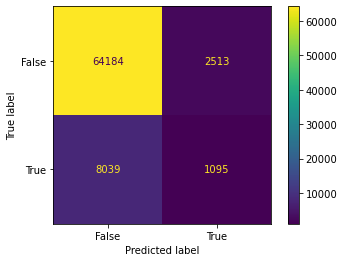

The Score of DecisionTree is : 0.81  
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     66697
           1       0.23      0.26      0.24      9134

    accuracy                           0.81     75831
   macro avg       0.57      0.57      0.57     75831
weighted avg       0.82      0.81      0.81     75831



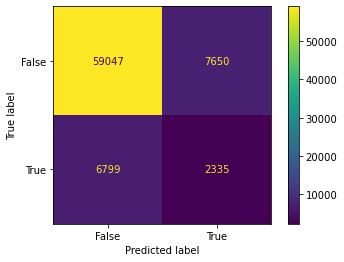

The Score of RandomForest is : 0.87  
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     66697
           1       0.33      0.06      0.11      9134

    accuracy                           0.87     75831
   macro avg       0.61      0.52      0.52     75831
weighted avg       0.82      0.87      0.83     75831



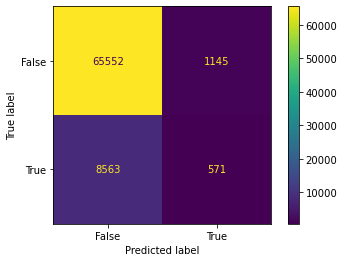

The Score of GaussianNB is : 0.79  
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     66697
           1       0.26      0.42      0.32      9134

    accuracy                           0.79     75831
   macro avg       0.59      0.63      0.60     75831
weighted avg       0.84      0.79      0.81     75831



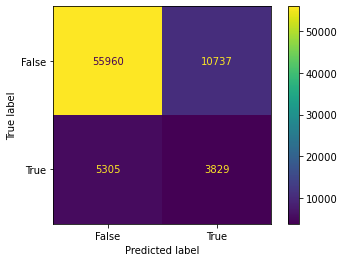

The Score of LogisticRegression is : 0.88  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     66697
           1       0.25      0.00      0.00      9134

    accuracy                           0.88     75831
   macro avg       0.56      0.50      0.47     75831
weighted avg       0.80      0.88      0.82     75831



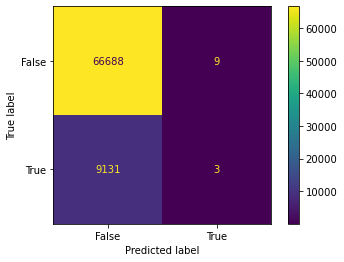

In [56]:
for i, j, m in zip(results, cm, report):
  print(i,'\n', m)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = j, display_labels = [False, True])
  cm_display.plot()
  plt.show()  

# Model 2: Building the model with selected Features<a name="72"></a>

In [58]:
df = pd.read_csv('CW1_data_202223.csv')
insurance_x = df[['Gender', 'HasDrivingLicense', 'Switch', 'VehicleAge', 'PastAccident']]
insurance_y = df.iloc[ :, -1:]
# 70% of the data for traingin, 30% for test, i.e., test_size=0.3
x= ['Gender', 'HasDrivingLicense', 'Switch', 'VehicleAge', 'PastAccident']
for cat in x:
    insurance_x[cat] = LabelEncoder().fit_transform(insurance_x[cat].astype(str))

X_train, X_test, y_train, y_test = train_test_split(insurance_x, insurance_y, test_size=1/3, random_state=85, stratify=insurance_y.iloc[:])

ord_cols = ['HasDrivingLicense', 'Switch', 'PastAccident']
ohe_cols = ['Gender', 'VehicleAge']

# Preprocessing pipeline
num_pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),('scaler', StandardScaler())])

pipeline = ColumnTransformer([('ord_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ord_cols),
     ('ohe_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ohe_cols)
    ]
)

In [73]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

results, cm, report = [], [], []
models = [('KNeighborsClassifier', KNeighborsClassifier()),('DecisionTree', DecisionTreeClassifier()),('RandomForest', RandomForestClassifier()),
          ('GaussianNB', GaussianNB()),('LogisticRegression',LogisticRegression()), ('XGBClassifier', XGBClassifier())]

#%% evaluate each model in turn
for name, model in models:
    myClassfier = Pipeline([('preprocessing', pipeline),('smote', SMOTE()), ('classifier', model)])
    myClassfier.fit(X_train, y_train)
    y_pred = myClassfier.predict(X_test)
    report.append(classification_report(y_test,y_pred ))
    cm.append(metrics.confusion_matrix(y_test,y_pred))
    results.append("The Score of %s is : %2.2f " % (name, accuracy_score(y_test, y_pred)))

The Score of KNeighborsClassifier is : 0.88  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     13201
           1       0.00      0.00      0.00      1821

    accuracy                           0.88     15022
   macro avg       0.44      0.50      0.47     15022
weighted avg       0.77      0.88      0.82     15022



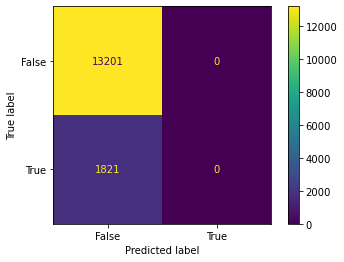

The Score of DecisionTree is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.79      0.57     15022
weighted avg       0.90      0.64      0.70     15022



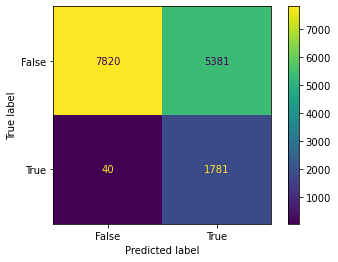

The Score of RandomForest is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.79      0.57     15022
weighted avg       0.90      0.64      0.70     15022



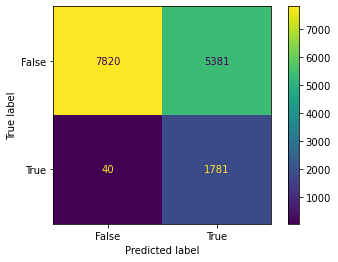

The Score of GaussianNB is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.79      0.57     15022
weighted avg       0.90      0.64      0.70     15022



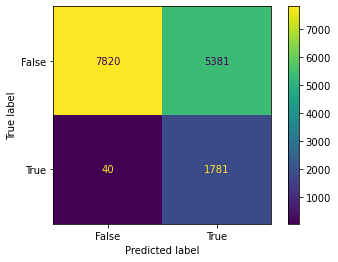

The Score of LogisticRegression is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.79      0.57     15022
weighted avg       0.90      0.64      0.70     15022



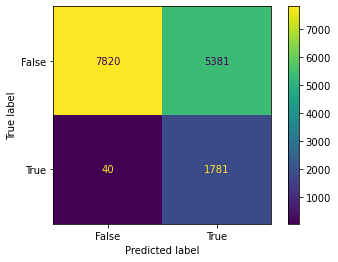

The Score of XGBClassifier is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.79      0.57     15022
weighted avg       0.90      0.64      0.70     15022



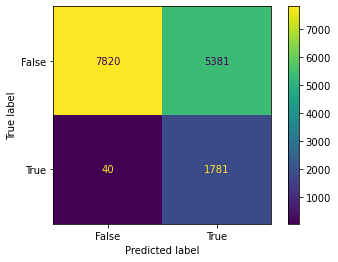

In [74]:
for i, j, m in zip(results, cm, report):
  print(i,'\n', m)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = j, display_labels = [False, True])
  cm_display.plot()
  plt.show()  

# Final model<a name="73"></a>

In [63]:
dataframe = pd.read_csv('CW1_data_202223.csv')
dataframe.dropna(inplace=True)
dataframe['AnnualPremium'] = dataframe['AnnualPremium'].str.replace(',', '').str.replace('£', '').astype(float)

In [64]:
X = dataframe.iloc[:,1:-1]
Y = dataframe.iloc[ :, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=85, stratify=Y.iloc[:])

In [65]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

numeric_column = ['AnnualPremium', 'DaysSinceCreated', 'Age']
cat_ord_column = ['HasDrivingLicense','RegionID', 'Switch', 'SalesChannelID']
category_column = ['Gender','VehicleAge','PastAccident']


In [66]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median", add_indicator=False)), ("scaler", StandardScaler())])

cat_ord_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent", add_indicator=False)), ("scaler", StandardScaler())])

category_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent", add_indicator=False)),
                                       ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat_col", category_transformer, category_column),
        ("cat_ord", cat_ord_transformer, cat_ord_column),
        ("num_col", numeric_transformer, numeric_column)
    ]
)

In [67]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train.values == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train.values == 0)))

X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res.values == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res.values == 0)))

Number transactions X_train dataset:  (30043, 10)
Number transactions y_train dataset:  (30043, 1)
Number transactions X_test dataset:  (15022, 10)
Number transactions y_test dataset:  (15022, 1)
Before OverSampling, counts of label '1': [3642]
Before OverSampling, counts of label '0': [26401] 

After OverSampling, the shape of train_X: (52802, 14)
After OverSampling, the shape of train_y: (52802, 1) 

After OverSampling, counts of label '1': [26401]
After OverSampling, counts of label '0': [26401]


In [68]:
results, cm, report = [], [], []
models = [('KNeighborsClassifier', KNeighborsClassifier()),('DecisionTree', DecisionTreeClassifier()),('RandomForest', RandomForestClassifier()),
          ('GaussianNB', GaussianNB()),('LogisticRegression',LogisticRegression()), ('XGBClassifier', XGBClassifier())]

#%% evaluate each model in turn
for name, model in models:
    myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()), ('classifier', model)])
    myClassfier.fit(X_train, y_train)
    y_pred = myClassfier.predict(X_test)
    report.append(classification_report(y_test,y_pred ))
    cm.append(metrics.confusion_matrix(y_test,y_pred))
    results.append("The Score of %s is : %2.2f " % (name, accuracy_score(y_test, y_pred)))

The Score of KNeighborsClassifier is : 0.75  
               precision    recall  f1-score   support

           0       0.94      0.77      0.84     13201
           1       0.28      0.64      0.39      1821

    accuracy                           0.75     15022
   macro avg       0.61      0.70      0.62     15022
weighted avg       0.86      0.75      0.79     15022



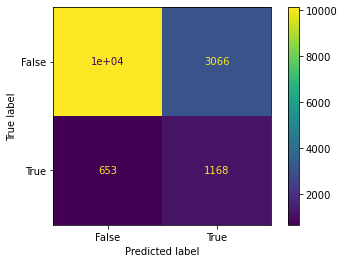

The Score of DecisionTree is : 0.82  
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     13201
           1       0.28      0.30      0.29      1821

    accuracy                           0.82     15022
   macro avg       0.59      0.60      0.59     15022
weighted avg       0.83      0.82      0.82     15022



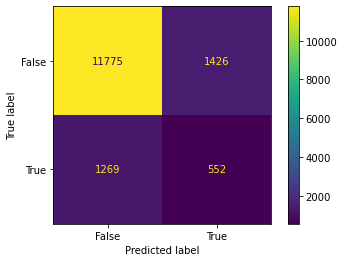

The Score of RandomForest is : 0.83  
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     13201
           1       0.33      0.43      0.37      1821

    accuracy                           0.83     15022
   macro avg       0.62      0.65      0.63     15022
weighted avg       0.85      0.83      0.83     15022



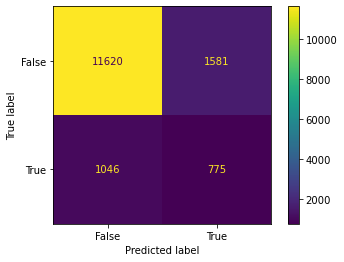

The Score of GaussianNB is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.79      0.57     15022
weighted avg       0.90      0.64      0.70     15022



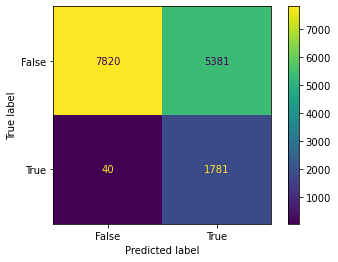

The Score of LogisticRegression is : 0.64  
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     13201
           1       0.25      0.98      0.40      1821

    accuracy                           0.64     15022
   macro avg       0.62      0.78      0.57     15022
weighted avg       0.90      0.64      0.70     15022



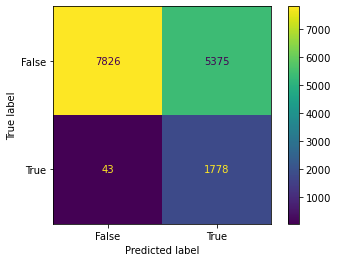

The Score of XGBClassifier is : 0.85  
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     13201
           1       0.37      0.28      0.32      1821

    accuracy                           0.85     15022
   macro avg       0.64      0.61      0.62     15022
weighted avg       0.84      0.85      0.85     15022



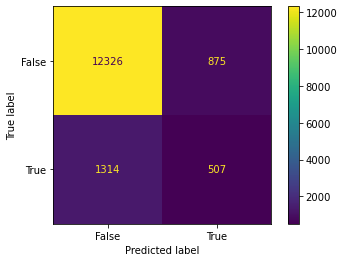

In [69]:
for i, j, m in zip(results, cm, report):
  print(i,'\n', m)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = j, display_labels = [False, True])
  cm_display.plot()
  plt.show()  

## K-Fold Cross validation KNeighborsClassifier

0.7510318199973373
K = 2, accuracy: 75.21%
K = 3, accuracy: 75.24%
K = 5, accuracy: 75.43%
K = 10, accuracy: 75.30%
K = 20, accuracy: 75.27%


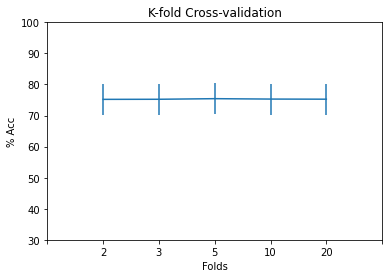

In [70]:
myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()),('classifier', KNeighborsClassifier())])
clf = myClassfier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

folds      = [2, 3, 5, 10, 20]
n_folds    = len(folds)
accuracies = []

# Run K-folds
for k in folds:
    cv     = KFold(n_splits=k)  # You will see the accuracy equals 0 when k=3, and very low when k=2. Can you explain why it is?
    #cv     = KFold(n_splits=k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, Y, cv=cv)
    accuracies.append(100 * scores.mean())
    print("K = %d, accuracy: %0.2f%%" % (k, accuracies[-1]))

# Print chart
plt.figure()
plt.errorbar(range(1, n_folds + 1), accuracies, yerr=[5] * n_folds)  # Use 5% for the error bars
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
plt.yticks(range(30, 110, 10))
plt.title("K-fold Cross-validation")
plt.xlabel("Folds")
plt.ylabel("% Acc")

plt.show()

## K-Fold Cross validation LogisticRegression

0.6392624151244841
K = 2, accuracy: 63.93%
K = 3, accuracy: 63.87%
K = 5, accuracy: 63.83%
K = 10, accuracy: 63.83%
K = 20, accuracy: 63.82%


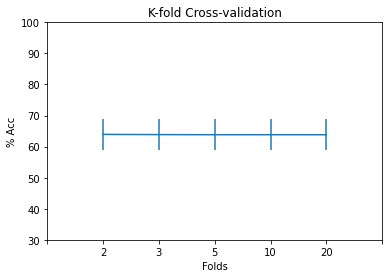

In [75]:
myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()),('classifier', LogisticRegression())])
clf = myClassfier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
folds      = [2, 3, 5, 10, 20]
n_folds    = len(folds)
accuracies = []

# Run K-folds
for k in folds:
    cv     = KFold(n_splits=k)  # You will see the accuracy equals 0 when k=3, and very low when k=2. Can you explain why it is?
    #cv     = KFold(n_splits=k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, Y, cv=cv)
    accuracies.append(100 * scores.mean())
    print("K = %d, accuracy: %0.2f%%" % (k, accuracies[-1]))

# Print chart
plt.figure()
plt.errorbar(range(1, n_folds + 1), accuracies, yerr=[5] * n_folds)  # Use 5% for the error bars
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
plt.yticks(range(30, 110, 10))
plt.title("K-fold Cross-validation")
plt.xlabel("Folds")
plt.ylabel("% Acc")
plt.show()

## K-Fold Cross validation XGBClassifier

0.8496871255491946
K = 2, accuracy: 84.33%
K = 3, accuracy: 84.60%
K = 5, accuracy: 84.57%
K = 10, accuracy: 84.66%
K = 20, accuracy: 84.64%


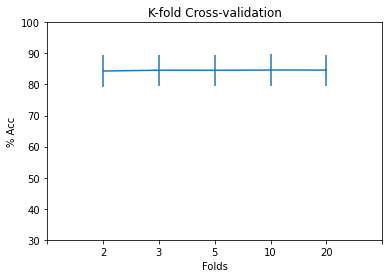

In [76]:
# Load libraries
from xgboost import XGBClassifier

myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()),('classifier', XGBClassifier())])
clf = myClassfier.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

folds      = [2, 3, 5, 10, 20]
n_folds    = len(folds)
accuracies = []

# Run K-folds
for k in folds:
    cv     = KFold(n_splits=k)  # You will see the accuracy equals 0 when k=3, and very low when k=2. Can you explain why it is?
    #cv     = KFold(n_splits=k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, Y, cv=cv)
    accuracies.append(100 * scores.mean())
    print("K = %d, accuracy: %0.2f%%" % (k, accuracies[-1]))

# Print chart
plt.figure()
plt.errorbar(range(1, n_folds + 1), accuracies, yerr=[5] * n_folds)  # Use 5% for the error bars
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
plt.yticks(range(30, 110, 10))
plt.title("K-fold Cross-validation")
plt.xlabel("Folds")
plt.ylabel("% Acc")

plt.show()

##Classification accuracy
Which metrics should you focus on?

*   Choice of metric depends on your business objective
*   Interested Customer classifier: (positive class is "Interested"): Optimize for sensitivity because false positives (normal customer that are flagged as possible interest) are more acceptable than false negatives (interested customer map as not interested)


[0 0 0 0 0 0 1 0 0 0]
[2.5739989e-03 5.4351112e-04 4.8851420e-04 1.9093038e-04 4.0479877e-04
 8.9327052e-02 5.0876087e-01 1.8799440e-03 6.0297531e-04 4.1490692e-01]


Text(0, 0.5, 'Frequency')

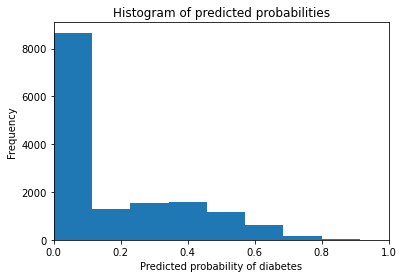

In [77]:
myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()), ('XGBClassifier', XGBClassifier())])
myClassfier.fit(X_train, y_train)
y_pred = myClassfier.predict(X_test)    
print(myClassfier.predict(X_test)[0:10])
# print the first 10 predicted probabilities of class membership
print(myClassfier.predict_proba(X_test)[0:10, 1])
# store the predicted probabilities for class 1
y_pred_prob = myClassfier.predict_proba(X_test)[:, 1]
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     13201
           1       0.32      0.50      0.39      1821

    accuracy                           0.81     15022
   macro avg       0.62      0.68      0.64     15022
weighted avg       0.85      0.81      0.83     15022



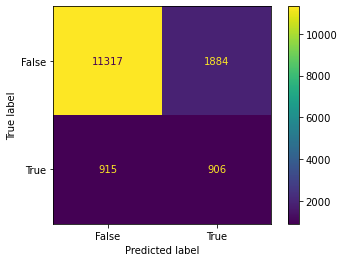

In [78]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.4)[0]
# new confusion matrix (threshold of 0.4)
print(classification_report(y_test,y_pred_class ))
y= (metrics.confusion_matrix(y_test, y_pred_class))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = y, display_labels = [False, True])
cm_display.plot()
plt.show()  

#ROC curve and AUC

No Skill: ROC AUC=0.500
XGBClassifier: ROC AUC=0.853


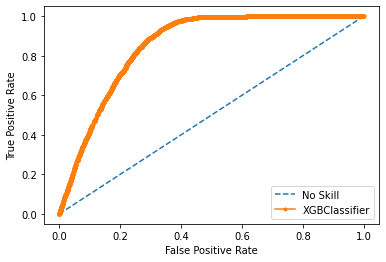

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

myClassfier = Pipeline([('preprocessing', preprocessor),('XGBClassifier', XGBClassifier())])
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
myClassfier.fit(X_train, y_train)
# predict probabilities
lr_probs = myClassfier.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Hyperparameter<a name="8"></a>

### **Hyperparameter optimisation using grid search**<a name="81"></a>
To use RandomForestRegressor, we first need to create a parameter grid to sample from during fitting:

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE())])
X_train_process = preprocessor.fit_transform(X_train) # fit and transform X_train
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_process, y_train)

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

### **Hyperparameter search using random search**<a name="82"></a>

In [ ]:

# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
# define search space
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train_processed, y_train)
X_test, y_test = sm.fit_resample(X_test_processed, y_test)
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
# execute search    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    
# summarize result
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8001287781228695
SCORE:
0.8003560336338156
SCORE:
0.826907052496023
SCORE:
0.7995227634270131
SCORE:
0.7987652450571926
SCORE:
0.8105825316263919
SCORE:
0.7992197560790849
SCORE:
0.7991440042421029
SCORE:
0.8000530262858875
SCORE:
0.7998257707749413
SCORE:
0.8242936141201425
SCORE:
0.799295507916067
SCORE:
0.7951670328005455
SCORE:
0.8342171047647905
SCORE:
0.8372850541625635
SCORE:
0.8094462540716613
SCORE:
0.8425119309143246
SCORE:
0.7992576319975759
SCORE:
0.799371259753049
SCORE:
0.8332323308840239
SCORE:
0.8377774411029467
SCORE:
0.79607605484433
SCORE:
0.8105067797894099
SCORE:
0.8264146655556397
SCORE:
0.804181501401409
SCORE:
0.8145973789864405
SCORE:
0.836527535792743
SCORE:
0.8200893871676388
SCORE:
0.8412620256041209
SCORE:
0.8086508597833497
SCORE:
0.8321339292477843
SCORE:
0.8256950231043103
SCORE:
0.7988788728126657
SCORE:
0.8344443602757367
SCORE:
0.8371714264070904
SCORE:
0.8250511324899629
SCORE:
0.817210817362321
SCORE:
0.7996363911824862
SCORE:
0.82452086963

In [ ]:
print("The best hyperparameters are : ","\n")
best_hyperparams

The best hyperparameters are :  



{'colsample_bytree': 0.5439157090469714,
 'gamma': 4.789242515210404,
 'max_depth': 13.0,
 'min_child_weight': 5.0,
 'reg_alpha': 40.0,
 'reg_lambda': 0.2167750142824019}

# Model after Hyperparameter Tuning
without hyper parameter tuning our model is performing well hence we select the base model with change in thresh hold.

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     13201
           1       0.32      0.64      0.42      1821

    accuracy                           0.79     15022
   macro avg       0.63      0.73      0.65     15022
weighted avg       0.87      0.79      0.82     15022



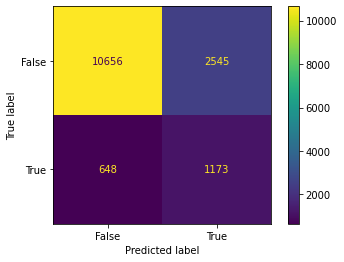

In [18]:
model = XGBClassifier(colsample_bytree=0.5439157090469714,
 gamma=4.789242515210404,
 max_depth=13,
 min_child_weight=5,
 reg_alpha=40,
 reg_lambda=0.2167750142824019)
myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()), ('XGBClassifier', model)])
myClassfier.fit(X_train, y_train)
y_pred = myClassfier.predict(X_test)    
print(classification_report(y_test,y_pred ))
y= (metrics.confusion_matrix(y_test, y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = y, display_labels = [False, True])
cm_display.plot()
plt.show()  

## Feature Importance<a name="83"></a>

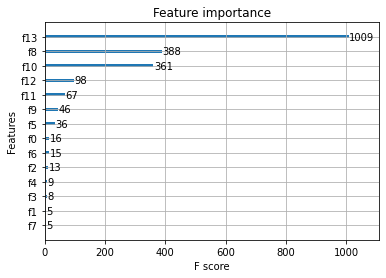

In [24]:
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
myClassfier = Pipeline([('preprocessing', preprocessor),('smote', SMOTE()), ('XGBClassifier', XGBClassifier())])
myClassfier.fit(X_train, y_train)

# plot feature importance
plot_importance(model)
pyplot.show()

F0-Gender, F1-Gender, F2-VehicleAge, F3-VehicleAge, F4-VehicleAge, F5-PastAccident, F6-PastAccident, F7- HasDrivingLicense, F8- RegionID,

F9 - Switch, F10 - SalesChannelID

F11 - AnnualPremium, F12 - DaysSinceCreated, F13 - Age



1.   Applicant with average age of 43.485836 has more enquiry/conversion.
2.   Region ID, SalesChannelID are other next to feature in the model.
3.   Gender, PastAccident, VehicleAge, HasDrivingLicense